In [1]:
import warnings
warnings.filterwarnings("ignore")
#분석결과 외에 불필요한 내용이 나오지 않도록 하는 옵션

import pandas as pd
data = pd.read_csv('Fvote.csv',encoding='utf-8')

In [2]:
X = data[data.columns[1:13]]
y = data[['vote']]

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42)

In [4]:
#그리드 탐색
#하이퍼파라미터의 특정값을 지정하고 가각 모델에 적용하여 모델 적합도를 비교 

from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.001,0.01,0.1,1,10,100]}

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
grid_search = GridSearchCV(LogisticRegression(),param_grid,cv=5,return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [7]:
print("Best Parameter : {}".format(grid_search.best_params_))
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))


Best Parameter : {'C': 1}
Best Cross-validity Score: 0.741


In [8]:
print("Test set Score : {:3f}".format(grid_search.score(X_test,y_test)))

Test set Score : 0.735849


In [10]:
result_grid = pd.DataFrame(grid_search.cv_results_)
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.019399,0.008516,0.001896,0.003791,0.001,{'C': 0.001},0.68750,0.71875,0.71875,0.709677,...,0.708871,0.011430,5,0.714286,0.706349,0.706349,0.708661,0.708661,0.708861,0.002903
1,0.016471,0.000680,0.000869,0.001739,0.01,{'C': 0.01},0.68750,0.71875,0.71875,0.709677,...,0.708871,0.011430,5,0.714286,0.706349,0.706349,0.708661,0.708661,0.708861,0.002903
2,0.017888,0.004623,0.000486,0.000973,0.1,{'C': 0.1},0.71875,0.68750,0.65625,0.741935,...,0.715726,0.041106,4,0.714286,0.746032,0.730159,0.724409,0.700787,0.723135,0.015185
3,0.034301,0.002880,0.000208,0.000416,1,{'C': 1},0.71875,0.68750,0.75000,0.741935,...,0.740927,0.039302,1,0.738095,0.761905,0.761905,0.748031,0.716535,0.745294,0.016960
4,0.035149,0.004183,0.003337,0.005377,10,{'C': 10},0.71875,0.68750,0.71875,0.741935,...,0.728226,0.028772,2,0.738095,0.738095,0.753968,0.740157,0.716535,0.737370,0.011987
5,0.036447,0.004223,0.001968,0.001607,100,{'C': 100},0.71875,0.68750,0.71875,0.741935,...,0.728226,0.028772,2,0.738095,0.730159,0.753968,0.740157,0.716535,0.735783,0.012307


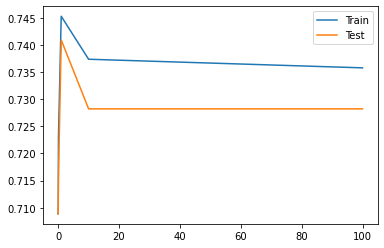

In [14]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_C'],result_grid['mean_train_score'],label="Train")
plt.plot(result_grid['param_C'], result_grid['mean_test_score'],label="Test")
plt.legend()

In [22]:
#랜덤 탐색
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {'C':randint(low=0.001,high=100)}

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
random_search = RandomizedSearchCV(LogisticRegression(),param_distributions=param_distribs,cv=5,return_train_score=True)
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024C22226DF0>},
                   return_train_score=True)

In [25]:
print("Best Parameter: {}".format(random_search.best_params_))
print("best cross-validity Score: {:.3f}".format(random_search.best_score_))

Best Parameter: {'C': 79}
best cross-validity Score: 0.728


In [26]:
result_random = random_search.cv_results_
pd.DataFrame(result_random)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015883,5.003649e-03,0.000000,0.000000,79,{'C': 79},0.71875,0.6875,0.71875,0.741935,...,0.728226,0.028772,1,0.738095,0.730159,0.753968,0.740157,0.716535,0.735783,0.012307
1,0.009372,7.652397e-03,0.000000,0.000000,20,{'C': 20},0.71875,0.6875,0.71875,0.741935,...,0.728226,0.028772,1,0.738095,0.730159,0.753968,0.740157,0.716535,0.735783,0.012307
2,0.012497,6.248491e-03,0.003125,0.006249,94,{'C': 94},0.71875,0.6875,0.71875,0.741935,...,0.728226,0.028772,1,0.738095,0.730159,0.753968,0.740157,0.716535,0.735783,0.012307
3,0.015621,2.065316e-06,0.000000,0.000000,38,{'C': 38},0.71875,0.6875,0.71875,0.741935,...,0.728226,0.028772,1,0.738095,0.730159,0.753968,0.740157,0.716535,0.735783,0.012307
4,0.018745,6.246925e-03,0.000000,0.000000,30,{'C': 30},0.71875,0.6875,0.71875,0.741935,...,0.728226,0.028772,1,0.738095,0.730159,0.753968,0.740157,0.716535,0.735783,0.012307
5,0.015622,1.806955e-06,0.000000,0.000000,50,{'C': 50},0.71875,0.6875,0.71875,0.741935,...,0.728226,0.028772,1,0.738095,0.730159,0.753968,0.740157,0.716535,0.735783,0.012307
6,0.015621,3.903080e-06,0.000000,0.000000,12,{'C': 12},0.71875,0.6875,0.71875,0.741935,...,0.728226,0.028772,1,0.738095,0.738095,0.753968,0.740157,0.716535,0.737370,0.011987
7,0.015622,7.325311e-07,0.000000,0.000000,31,{'C': 31},0.71875,0.6875,0.71875,0.741935,...,0.728226,0.028772,1,0.738095,0.730159,0.753968,0.740157,0.716535,0.735783,0.012307
8,0.015621,7.168434e-07,0.000000,0.000000,86,{'C': 86},0.71875,0.6875,0.71875,0.741935,...,0.728226,0.028772,1,0.738095,0.730159,0.753968,0.740157,0.716535,0.735783,0.012307
9,0.009374,7.653526e-03,0.000000,0.000000,30,{'C': 30},0.71875,0.6875,0.71875,0.741935,...,0.728226,0.028772,1,0.738095,0.730159,0.753968,0.740157,0.716535,0.735783,0.012307


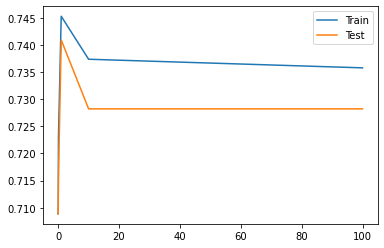

In [28]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_C'], result_grid['mean_train_score'],label="Train")
plt.plot(result_grid['param_C'],result_grid['mean_test_score'],label="Test")
plt.legend()

In [29]:
#모델평가
Final_model=LogisticRegression(C=10)
Final_model.fit(X_train,y_train)

LogisticRegression(C=10)

In [30]:
pred_train = Final_model.predict(X_train)
Final_model.score(X_train,y_train)

0.759493670886076

In [31]:
pred_test = Final_model.predict(X_test)
Final_model.score(X_test,y_test)

0.7169811320754716

In [33]:
from sklearn.metrics import confusion_matrix
confusion_train = confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬 : \n",confusion_train)

훈련데이터 오차행렬 : 
 [[ 13  33]
 [  5 107]]


In [35]:
from sklearn.metrics import classification_report
cfreport_train = classification_report(y_train,pred_train)
print("분류예측 리포트: \n",cfreport_train)

분류예측 리포트: 
               precision    recall  f1-score   support

           0       0.72      0.28      0.41        46
           1       0.76      0.96      0.85       112

    accuracy                           0.76       158
   macro avg       0.74      0.62      0.63       158
weighted avg       0.75      0.76      0.72       158



In [37]:
confusion_test = confusion_matrix(y_test, pred_test)
print("테스트 데이터 오차행렬 : \n",confusion_test)

테스트 데이터 오차행렬 : 
 [[ 3 12]
 [ 3 35]]


In [38]:
from sklearn.metrics import classification_report
cfreport_test = classification_report(y_test,pred_test)
print("분류예측 레포트 : \n",cfreport_test)

분류예측 레포트 : 
               precision    recall  f1-score   support

           0       0.50      0.20      0.29        15
           1       0.74      0.92      0.82        38

    accuracy                           0.72        53
   macro avg       0.62      0.56      0.55        53
weighted avg       0.68      0.72      0.67        53



In [40]:
from sklearn.metrics import roc_curve,auc
from sklearn import metrics

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,Final_model.decision_function(X_test))
roc_auc = metrics.roc_auc_score(y_test,Final_model.decision_function(X_test))
roc_auc

0.593859649122807

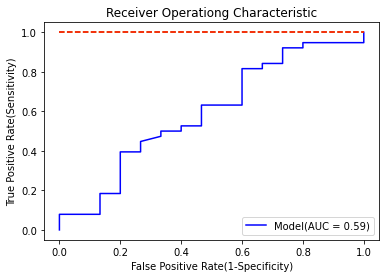

In [41]:
import matplotlib.pyplot as plt
plt.title('Receiver Operationg Characteristic')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(false_positive_rate,true_positive_rate,'b',label='Model(AUC = %0.2f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[1,1],'r--')

plt.legend(loc='lower right')
plt.show()